In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter

In [2]:
users_df = pd.read_csv('takehome_users.csv', encoding='latin-1')
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
engagement_df = pd.read_csv('takehome_user_engagement.csv',encoding='latin-1')
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
users_df.isnull().any()

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
dtype: bool

In [7]:
engagement_df.isnull().any()

time_stamp    False
user_id       False
visited       False
dtype: bool

### Data Exploration

In [8]:
# Identify how many active users.
print('There are {} users have logged into the application as least once.'.format(len(list(engagement_df['user_id'].unique()))))

There are 8823 users have logged into the application as least once.


In [9]:
# How many inactive users?
print('There are', len(users_df[users_df['last_session_creation_time'].isnull()]), 'users never logged into the application for once.')

There are 3177 users never logged into the application for once.


Those two numbers 

In [10]:
engagement_df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [11]:
# Convert time_stamp to datetime.
engagement_df['time_stamp']=pd.to_datetime(engagement_df['time_stamp'], infer_datetime_format=True)
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [12]:
# Add new feature 'adopted'.
adopted_dict = {}
week = datetime.timedelta(7)

for user_id in sorted(list(engagement_df['user_id'].unique())):
    
    adopted = True
    temp = engagement_df[engagement_df['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted == True:
            continue
        time = temp.get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= time) & (temp['time_stamp'] <= (time + week))]) >= 3:
            adopted = True
    else:
        adopted = False

    adopted_dict[user_id] = adopted
    
    """
adopted_dict = {}
week = datetime.timedelta(7)

for user_id in sorted(list(engagement_df['user_id'].unique())):
    
    adopted = False
    temp = engagement_df[engagement_df['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    
    for row in temp.itertuples():
        if adopted == True:
            continue
        time = temp.get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= time) & (temp['time_stamp'] <= (time + week))]) >= 3:
            adopted = True

    adopted_dict[user_id] = adopted
    """
# The second for loop returns a percentage of true adopted user: 13.8%

In [13]:
count_df = pd.DataFrame.from_dict(Counter(list(adopted_dict.values())), orient='index').reset_index()

In [14]:
users_df['adopted'] = True
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,True


In [15]:
for row in (users_df[np.logical_not(users_df['last_session_creation_time'].isnull())]).itertuples():
    adopted_value = adopted_dict[users_df.get_value(row[0], 'object_id')]
    users_df.set_value(row[0], 'adopted', adopted_value)

C:\Users\ella\Downloads\J\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\ella\Downloads\J\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
len(users_df[users_df['adopted'] == True])/len(users_df)*100

26.474999999999998

In [17]:
users_df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,True
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,True
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,False


In [20]:
# Fill NaN in 'last_session_creation_time' column.
users_df['last_session_creation_time'] = users_df['last_session_creation_time'].fillna(users_df['last_session_creation_time'].median())

In [25]:
# Generate new time features out of 'creation_time'.
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df['creation_weekday'] = users_df['creation_time'].apply(lambda x: x.dayofweek)
users_df['creation_hour'] = users_df['creation_time'].apply(lambda x: x.hour)

In [27]:
# Drop columns we are not going to use.
users_df.drop(['creation_time', 'name', 'email', 'invited_by_user_id', 'object_id'], axis=1, inplace=True)

In [29]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
adopted                       12000 non-null bool
creation_weekday              12000 non-null int64
creation_hour                 12000 non-null int64
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 668.0+ KB


In [30]:
# One hot encoding
users_encoded = pd.get_dummies(users_df, columns = ['creation_source'])

In [34]:
from sklearn.model_selection import train_test_split

X = users_encoded.drop('adopted', axis=1)
y = users_encoded['adopted']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
param_grid = {'C':[0.01,0.1,1,10,100]}
clf_cv = GridSearchCV(clf,param_grid,cv=5)

clf_cv.fit(X_train,y_train)

print(accuracy_score(clf_cv.predict(X_test), y_test))

C:\Users\ella\Downloads\J\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ella\Downloads\J\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ella\Downloads\J\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ella\Downloads\J\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ella\Downloads\J\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.7352777777777778


In [37]:
clf.fit(X_train,y_train)
coef=clf.coef_
columns=X.columns

coef_df=pd.DataFrame(data=coef[0],index=columns)
ranked=coef_df.sort_values(0)
ranked

C:\Users\ella\Downloads\J\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
last_session_creation_time,-7.380430e-10
org_id,-8.059666e-17
creation_hour,-6.257349e-18
creation_weekday,-1.576947e-18
creation_source_SIGNUP,-3.197996e-19
creation_source_SIGNUP_GOOGLE_AUTH,-2.990794e-19
creation_source_ORG_INVITE,-2.320645e-19
opted_in_to_mailing_list,-1.596390e-19
enabled_for_marketing_drip,-1.051067e-19
creation_source_GUEST_INVITE,-8.743844e-20


In [39]:
users_encoded.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_weekday,creation_hour,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1.380235e+09,0.249500,0.149333,141.884583,2.998167,11.564333,0.180250,0.354500,0.175917,0.173917,0.115417
std,1.682262e+07,0.432742,0.356432,124.056723,1.981243,6.914888,0.384412,0.478381,0.380765,0.379054,0.319537
min,1.338452e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.370563e+09,0.000000,0.000000,29.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.382888e+09,0.000000,0.000000,108.000000,3.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.393729e+09,0.000000,0.000000,238.250000,5.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.402067e+09,1.000000,1.000000,416.000000,6.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score


model = lgb.LGBMClassifier(num_iterations=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
model.fit(X_train, y_train, eval_metric = 'auc')

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.05, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
               n_jobs=-1, num_leaves=31, objective='binary', random_state=50,
               reg_alpha=0.1, reg_lambda=0.1, silent=True, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=0)

In [44]:
print(roc_auc_score(model.predict(X_test), y_test))

0.999475890985325


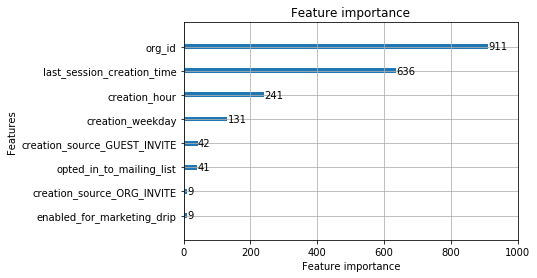

In [55]:
lgb.plot_importance(model, max_num_features=None)
plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(roc_auc_score(y_pred, y_test))

0.9134645423305217


In [62]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(roc_auc_score(y_pred, y_test))

0.8923806700266825


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train, y_train)
y_pred = gbclf.predict(X_test)
print(roc_auc_score(y_pred, y_test))

0.999475890985325
